Optimal Parameters: [2.0428167045217416, 12.075502189917245, 0.1030265640015112, 0.995627927720144, 0.9848934287517916]
Minimum Cost: 1.0346814065672632


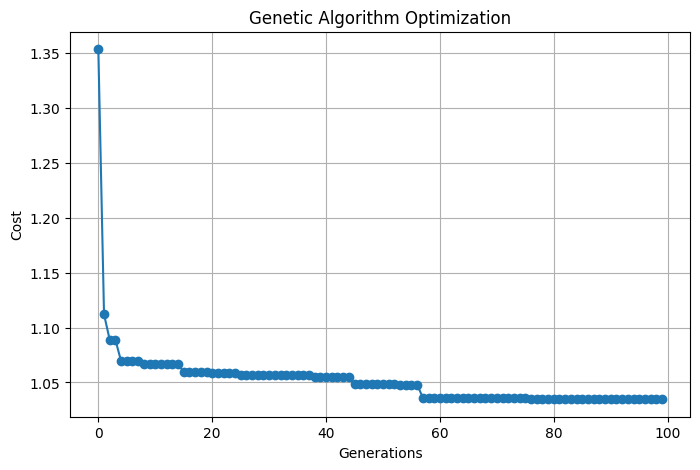

In [7]:
import random
import math
import matplotlib.pyplot as plt

# Define the complex cost function
# Define the complex cost function
def complex_cost_function(D, F, Q, SM, WD):
    # Coefficients
    a1 = 0.5  # Weight for irrigation duration
    a2 = 0.3  # Weight for irrigation frequency
    a3 = 0.2  # Weight for flow rate
    a4 = 0.4  # Weight for soil moisture
    a5 = 0.6  # Weight for weather data

    # Define constraints
    min_duration = 2  # Minimum allowable irrigation duration (hours)
    max_duration = 8  # Maximum allowable irrigation duration (hours)
    min_frequency = 12  # Minimum allowable irrigation frequency (hours)
    max_frequency = 36  # Maximum allowable irrigation frequency (hours)
    max_flow_rate = 2.0  # Maximum allowable flow rate (L/s)

    # Calculate cost components
    cost_duration = a1 * math.exp(D / max_duration)  # Penalize long durations
    cost_frequency = a2 * math.exp((F - min_frequency) / (max_frequency - min_frequency))  # Penalize low frequency
    cost_flow_rate = a3 * math.exp((Q - max_flow_rate) / max_flow_rate)  # Penalize high flow rate
    cost_soil_moisture = a4 * (1 - SM)  # Penalize dry soil
    cost_weather_data = a5 * (1 - WD)  # Penalize unfavorable weather

    # Calculate the total cost
    total_cost = cost_duration + cost_frequency + cost_flow_rate + cost_soil_moisture + cost_weather_data

    return total_cost


# Genetic algorithm for optimization with plotting
def genetic_algorithm_with_plot(population_size, num_generations, mutation_rate, lower_bounds, upper_bounds):
    # Initialize the population
    population = [[random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)] for _ in range(population_size)]

    # Lists to store optimization progress for plotting
    generation_list = []
    best_cost_list = []

    for generation in range(num_generations):
        # Evaluate the fitness of each individual in the population
        fitness_scores = [complex_cost_function(*individual) for individual in population]

        # Select the top individuals based on fitness (elite selection)
        elite_size = int(0.2 * population_size)  # Select the top 20% as elites
        elite_indices = sorted(range(len(fitness_scores)), key=lambda i: fitness_scores[i])[:elite_size]
        elites = [population[i] for i in elite_indices]

        # Create a new population through crossover and mutation
        new_population = elites[:]
        while len(new_population) < population_size:
            parent1, parent2 = random.choices(elites, k=2)
            crossover_point = random.randint(1, len(parent1) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            
            # Apply mutation
            if random.random() < mutation_rate:
                mutation_point = random.randint(0, len(child) - 1)
                child[mutation_point] = random.uniform(lower_bounds[mutation_point], upper_bounds[mutation_point])

            new_population.append(child)

        # Replace the old population with the new population
        population = new_population

        # Store progress data for plotting
        best_cost = min(fitness_scores)
        generation_list.append(generation)
        best_cost_list.append(best_cost)

    # Find the best solution after optimization
    best_index = fitness_scores.index(min(fitness_scores))
    best_solution = population[best_index]

    return best_solution, min(fitness_scores), generation_list, best_cost_list

# Define search space bounds for each parameter
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed

# Run the genetic algorithm to find the optimal parameters and plot the progress
best_params, min_cost, generations, costs = genetic_algorithm_with_plot(population_size=50, num_generations=100, mutation_rate=0.1, lower_bounds=lower_bounds, upper_bounds=upper_bounds)

# Output the results
print("Optimal Parameters:", best_params)
print("Minimum Cost:", min_cost)

# Plot optimization progress
plt.figure(figsize=(8, 5))
plt.plot(generations, costs, marker='o', linestyle='-')
plt.title("Genetic Algorithm Optimization")
plt.xlabel("Generations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()